# Perturbation Theory

We deal here with the calculation of the second-order corrections to the normal and anomalous Green's functions in the MTI-SC heterostructure.
In all that follows, we assume that the Hamiltonian can be written as $H = H_0 + V$, where $H_0 = H_{SC} + H_{MTI}$ is the Hamiltonian for the uncoupled materials and $V$ is the tunneling term.
Using interacting picture, we can write a perturbative series and compute the effect of proximity pairing in the MTI due to the superconductor.


## **Normal Green's Function**


Using interacting picture, the normal MTI Green's function
$$
	\mathcal{G}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') =
	-i \left\langle
	\hat{T}_t \hat{\psi}_{\sigma \lambda}(zt) \hat{\psi}^\dagger_{\sigma' \lambda'}(z't')
	\right\rangle \,,
$$
can be written in perturbative series as
$$
\begin{split}
	\mathcal{G}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') 
	=
	\sum_{n=0}^{+\infty} \frac{(-i)^{n+1}}{n!} \int_{-\infty}^{+\infty} dt_1 \, \dots \int_{-\infty}^{+\infty} dt_n \, 
	%
	\frac{
	\bra{\phi_0} \hat{T}_t
	\check{\psi}_{\sigma\lambda}(zt) 
	\check{V}(t_1) \dots \check{V}(t_n)	
	\check{\psi}^\dagger_{\sigma'\lambda'}(z't') 
	}
	{\bra{\phi_0} S(+\infty, -\infty) \ket{\phi_0}} \,.
\end{split}
$$
Since all the odd-order terms vanishes, the most important correction to the unperturbed Green's function is given by the *second order* one
$$
\begin{split}
	\mathcal{G}^{(2)}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') 
	=&
	\frac{i}{2} \int dt_1 \, \int dt_2 \, 
	\left\langle
	\hat{T}_t \check{\psi}_{\sigma\lambda}(zt) \check{V}(t_1) \check{V}(t_2) \check{\psi}_{\sigma'\lambda'}^\dagger(z't')
	\right\rangle_0 = \\[5pt]
	%%%
	=&
	\sum_{ss't} \sum_{rr'l}
	\int dt_1 \, \int dt_2 \, \int dw \, dw' \, \int dv \, dv' \,
	\gamma_{st}^{s'}(w,w') \gamma_{rl}^{r' \, \dagger}(v',v) \times \\[5pt]
	%
	& \times
	\Bigl\{
	\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(zt, z't')
	\mathcal{G}^{(0)}_{s' r'}(w' t_1, v' t_2)
	\mathcal{G}^{(0)}_{rl, st}(v t_2, w t_1)
	- \\[5pt]
	%
	& -	
	\mathcal{G}^{(0)}_{\sigma\lambda, st}(zt, w t_1)
	\mathcal{G}^{(0)}_{s',r'}(w' t_1, v' t_2)
	\mathcal{G}^{(0)}_{rl, \sigma'\lambda'}(v t_2, z't')
	\Bigr\} \,,
\end{split}
$$
which we expressed in terms of the *unperturbed* Green's function $\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(zt,z't')$ in the MTI and the *unperturbed* Green's function $\mathcal{G}^{(0)}_{\sigma, \sigma'}(zt,z't')$ in the SC.
The corresponding Feynman diagrams are plotted in the picture below:

<p style="text-align:center;">
<img src="Correction_NormalGF.png" width=85% height=85% class="center" />
</p>

Since the first one is a disconnected diagram, we can neglect it and the second-order correction to the normal MTI Green's function is thus given by
$$
\begin{split}
	\mathcal{G}^{(2)}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') 
	=
	-\sum_{ss't} \sum_{rr'l}
	& \int dt_1 \, dt_2 \, \int dw \, dw' \, \int dv \, dv' \,
	\gamma_{st}^{s'}(w,w') \gamma_{rl}^{r' \, \dagger}(v',v) \times \\[5pt]
	%
	& \times
	\Bigl\{
	\mathcal{G}^{(0)}_{\sigma\lambda, st}(zt, w t_1)
	\mathcal{G}^{(0)}_{s',r'}(w' t_1, v' t_2)
	\mathcal{G}^{(0)}_{rl, \sigma'\lambda'}(v t_2, z't')
	\Bigr\} \,.
\end{split}
$$

#### <font> Tunneling </font> 
We assume that the tunneling term is given by
$$
    \gamma_{\sigma\lambda}^{\sigma'}(z,z') = \gamma \delta_{\sigma\sigma'} \delta(z-z') f(z) \,,
$$
where $\lambda$ characterizes the interface cleanliness and we assumed that 

the spatial dependence of the tunneling can be assumed as a Gaussian centered at the interface $z=d$ between the SC and the MTI 
$$
    f(z) = \exp 
    \Biggl\lbrack -\frac{(z-d)}{2 \lambda_{tun}^2} \Biggr\rbrack \,.
$$

In [4]:
import numpy as np

from GreenFunctions_MTI import GFexact, eigenstates
from GreenFunctions_SC import GFnormal, GFanomalous

# Hamiltonian parameters
params=dict(C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6)

# function for tunneling amplitude 
def spatial_tunneling(z, d, lT):

    return np.exp( -(z-d)**2/(2*lT**2) )

#### <font color='green'> **Plot** </font> 

Below, we plot the tunneling amplitude as a function of the $z$ coordinate.

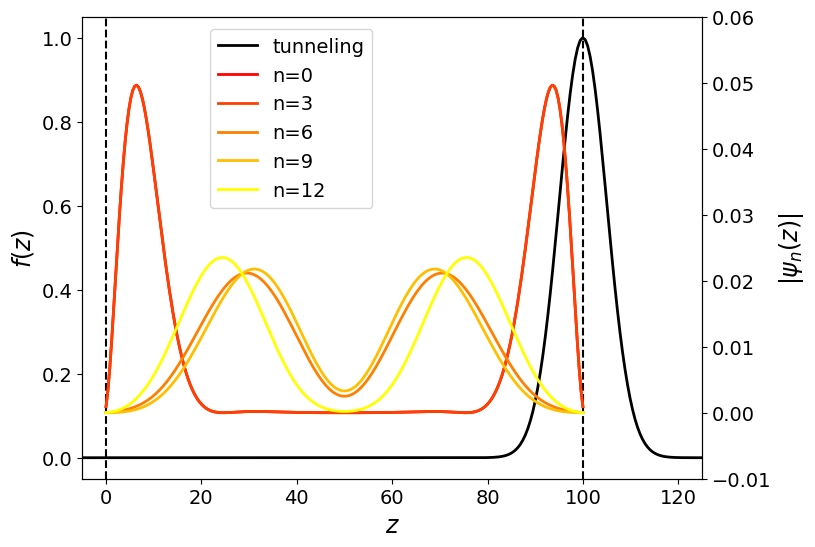

In [35]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# figure
fig, ax = plt.subplots(figsize=(8, 6)); ax2 = ax.twinx()


# color map for MTI states
n = 13; cmap = plt.get_cmap('autumn', n)
# discrete lattice MTI
Nlat = 250; d = 100.; dZ = d/(Nlat-1)
# MTI eigenstates
lattice, egval, spinors = eigenstates(Nlat=Nlat, dZ=dZ, kx=0., ky=0., L=0.)

# loop over eigenvalues
for iegv in range(0,n,3):
    # probability density for each lattice point
    probdens = np.array([np.vdot(s, s) for s in spinors[iegv]]).real
    # plot probability density
    ax2.plot(lattice, probdens, label='n=' + str(iegv), lw=2, c=cmap(iegv))


# tunneling parameters
lT = 0.05*d; Z = np.linspace(-5., 125., 250)
# tunneling amplitude
fz = [spatial_tunneling(z, d, lT) for z in Z]

# plot tunneling amplituede
ax.plot(Z, fz, c='black', lw=2, label='tunneling')
# plot line at the interface
ax.axvline(x=d, c='black', ls='dashed'); ax.axvline(x=0, c='black', ls='dashed')


ax.set_xlim(-5, 125.); ax2.set_ylim(-0.01, 0.06)
ax.set_xlabel("$z$", fontsize = 17)
ax.set_ylabel("$f(z)$", fontsize = 17)
ax2.set_ylabel("$|\psi_n(z)|$", fontsize = 17)

ax.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
fig.legend(fontsize=14, bbox_to_anchor=(0.5, 0.875));

## **Anomalous Green's Function**

<p style="text-align:center;">
<img src="Correction_AnomalousGF.png" width=85% height=85% class="center" />
</p>